In [16]:
import torch
from torchvision import transforms
from PIL import Image


In [17]:
image = Image.open('./data/829821.png')



In [28]:
transform = transforms.Compose([transforms.ToTensor()])
tensor_img = transform(image)
print(tensor_img.shape)

tensor_img_3 = tensor_img[[0,1,2],:,:]
print(tensor_img_3.shape)

torch.Size([4, 639, 595])
torch.Size([3, 639, 595])


In [32]:
#transform = transforms.Compose([transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # This one works
transform = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # this one also works
# the input must be 3 channels
tensor_img_norm = transform(tensor_img_3)
print(tensor_img_3)
print(tensor_img_norm)

tensor([[[0.9176, 0.9176, 0.9176,  ..., 0.9176, 0.9176, 0.9176],
         [0.9373, 0.9373, 0.9373,  ..., 0.9373, 0.9373, 0.9373],
         [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.9176, 0.9176, 0.9176,  ..., 0.9176, 0.9176, 0.9176],
         [0.9373, 0.9373, 0.9373,  ..., 0.9373, 0.9373, 0.9373],
         [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.9176, 0.9176, 0.9176,  ..., 0.9176, 0.9176, 0.9176],
         [0.9373, 0.9373, 0.9373,  ..., 0.9373, 0.9373, 0.9373],
         [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.

In [35]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.CenterCrop((200, 100))])
tensor_img = transform(image)
tensor_img.shape


torch.Size([4, 200, 100])

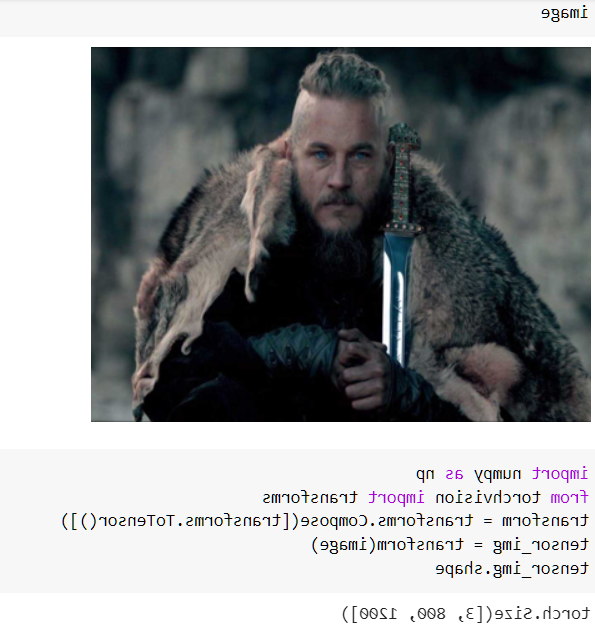

In [36]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.9)])
tensor_img = transform(image)
tensor_img

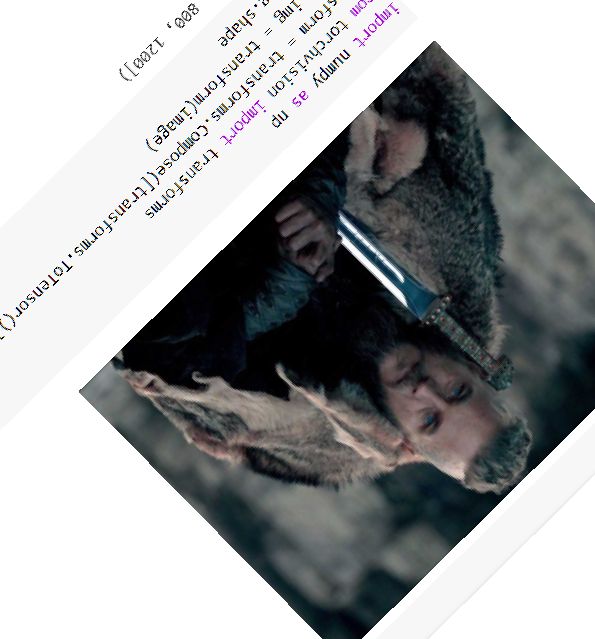

In [39]:
transform = transforms.Compose([transforms.RandomRotation(degrees=180)])
tensor_img = transform(image)
tensor_img

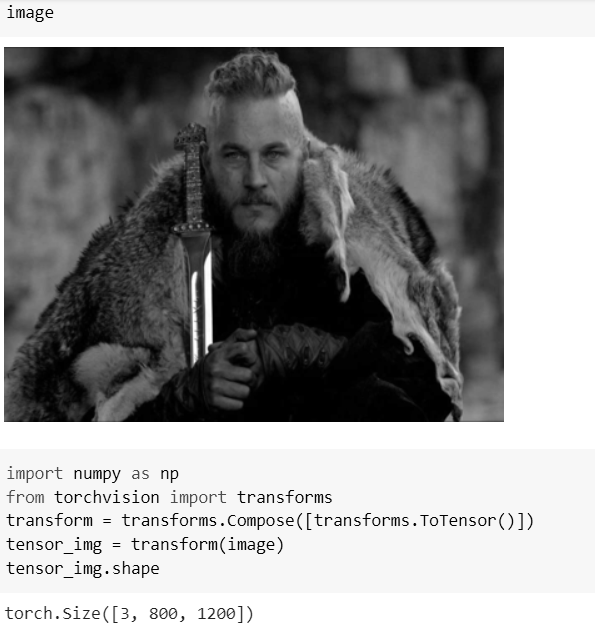

In [40]:
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1)])
tensor_img = transform(image)
tensor_img

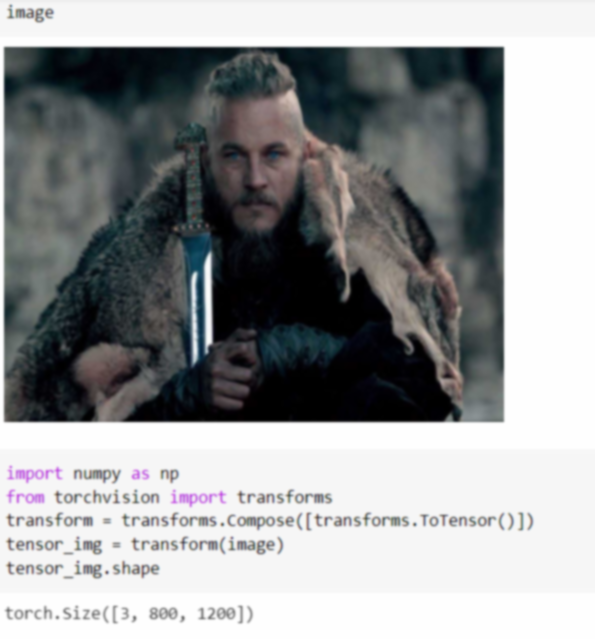

In [42]:
transform = transforms.Compose([transforms.GaussianBlur(kernel_size=51)])
tensor_img = transform(image)
tensor_img

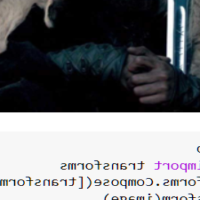

In [48]:
transform = transforms.RandomApply([transforms.RandomResizedCrop(200), transforms.RandomHorizontalFlip()], p=0.6)
tensor_img = transform(image)
tensor_img

In [44]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

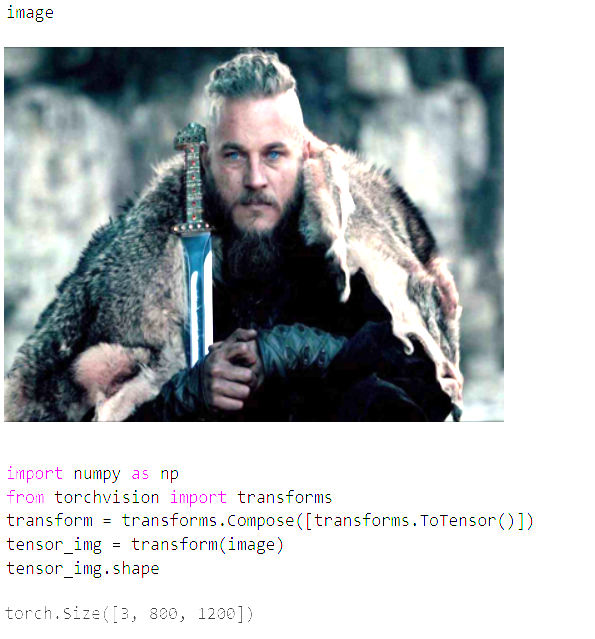

In [49]:
new_img = transforms.functional.adjust_brightness(image,brightness_factor=2)
new_img

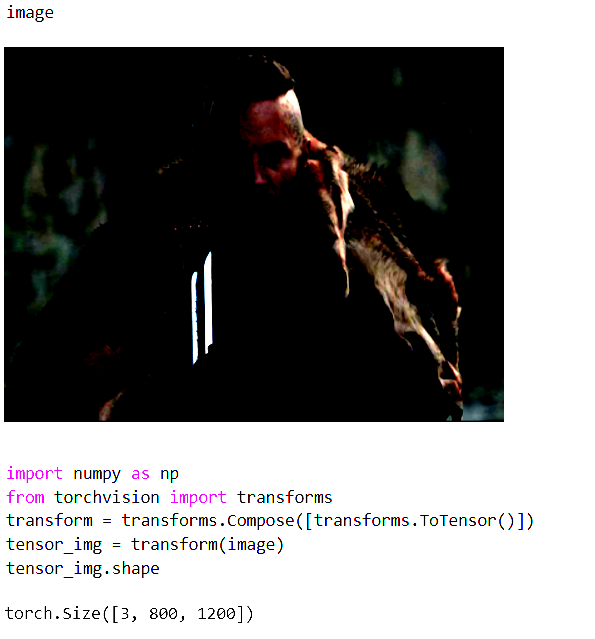

In [50]:
new_img = transforms.functional.adjust_contrast(image,contrast_factor=3.8)
new_img

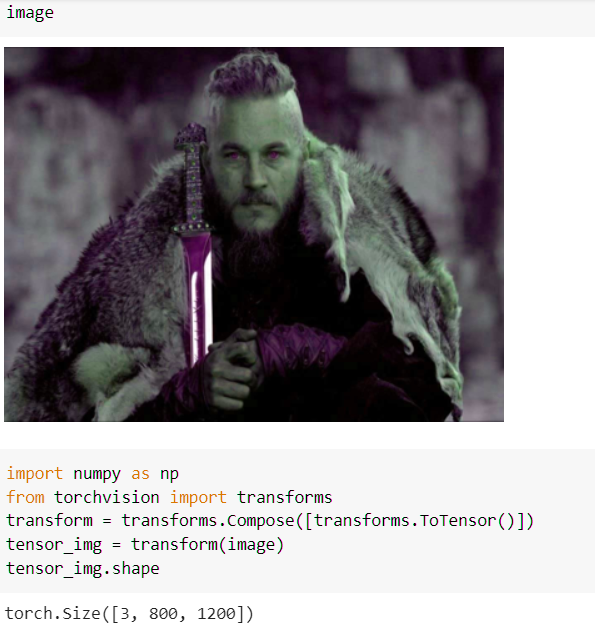

In [51]:
new_img = transforms.functional.adjust_hue(image,hue_factor=0.3)
new_img

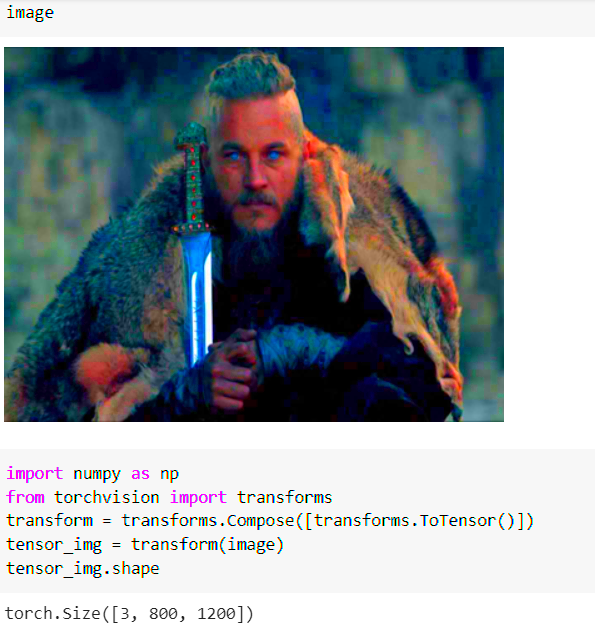

In [53]:
new_img = transforms.functional.adjust_saturation(image,saturation_factor=6)
new_img

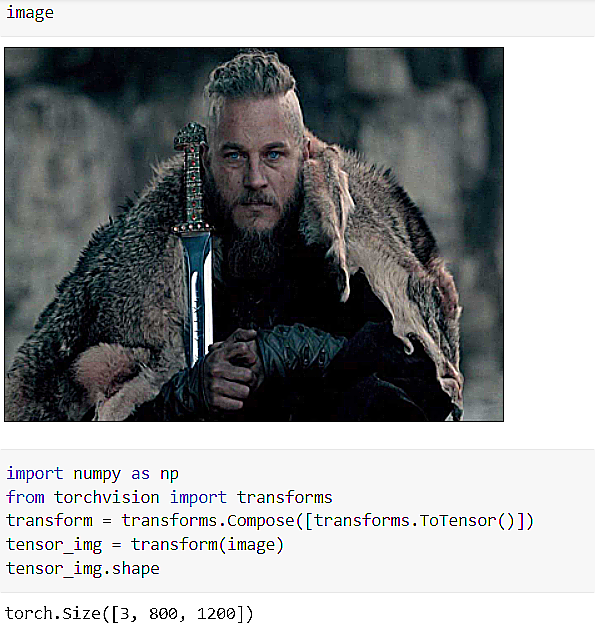

In [55]:
new_img = transforms.functional.adjust_sharpness(image, sharpness_factor=10)
new_img

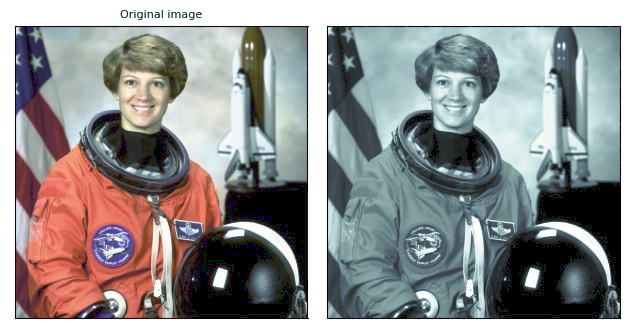

In [89]:
# it seems only jpg image are supported
image = Image.open('./data/astronaut.jpg')
image
# transform = transforms.ToPILImage()
# image = transform(image)
# image


#equalizer = transforms.RandomEqualize()
#equalized_imgs = [equalizer(image) for _ in range(4)]
equalized_imgs = transforms.functional.equalize(image)

equalized_imgs
# equalized_imgs[0]
# equalized_imgs[1]
#equalized_imgs[2]
#plot(equalized_imgs)
# new_img


In [97]:
import matplotlib.pyplot as plt
import numpy as np

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [image] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

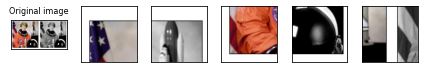

In [98]:
(top_left, top_right, bottom_left, bottom_right, center) = transforms.FiveCrop(size=(100, 100))(image)
plot([top_left, top_right, bottom_left, bottom_right, center])